In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
#from imblearn.over_sampling import SMOTE
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop


In [11]:
forest = pd.read_csv("forestfires.csv")

In [12]:
forest

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         1         0   

     monthsep  size_category  
0           0          small  
1           0          small  
2           0          small  
3           0          small  
4           0          small  
..        ...            ...  
512         0          large  
513         0          large  
514         0          large  
515         0          small  
516         0          small  

[517 rows x 31 columns]

In [13]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [14]:
forest["size_category"].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [15]:
forest.corr()

FFMC       DMC        DC       ISI      temp        RH  \
FFMC      1.000000  0.382619  0.330512  0.531805  0.431532 -0.300995   
DMC       0.382619  1.000000  0.682192  0.305128  0.469594  0.073795   
DC        0.330512  0.682192  1.000000  0.229154  0.496208 -0.039192   
ISI       0.531805  0.305128  0.229154  1.000000  0.394287 -0.132517   
temp      0.431532  0.469594  0.496208  0.394287  1.000000 -0.527390   
RH       -0.300995  0.073795 -0.039192 -0.132517 -0.527390  1.000000   
wind     -0.028485 -0.105342 -0.203466  0.106826 -0.227116  0.069410   
rain      0.056702  0.074790  0.035861  0.067668  0.069491  0.099751   
area      0.040122  0.072994  0.049383  0.008258  0.097844 -0.075519   
dayfri    0.019306 -0.012010 -0.004220  0.046695 -0.071949  0.064506   
daymon   -0.059396 -0.107921 -0.052993 -0.158601 -0.136529  0.009376   
daysat   -0.019637 -0.003653 -0.035189 -0.038585  0.034899 -0.023869   
daysun   -0.089517  0.025355 -0.001431 -0.003243  0.014403  0.136220   
daythu    0.071730  0.087672  0.051859 -0.022406  0.051432 -0.123061   
daytue    0.011225  0.000016  0.028368  0.068610  0.035630 -0.014211   
daywed    0.093908  0.017939  0.024803  0.125415  0.090580 -0.087508   
monthapr -0.117199 -0.197543 -0.268211 -0.106478 -0.157051  0.021235   
monthaug  0.228103  0.497928  0.279361  0.334639  0.351404  0.054761   
monthdec -0.137044 -0.176301 -0.105642 -0.162322 -0.329648 -0.047714   
monthfeb -0.281535 -0.317899 -0.399277 -0.249777 -0.320015  0.140430   
monthjan -0.454771 -0.105647 -0.115064 -0.103588 -0.146520  0.170923   
monthjul  0.031833 -0.001946 -0.100887  0.020982  0.142588  0.013185   
monthjun -0.040634 -0.050403 -0.186183  0.111516  0.051015  0.009382   
monthmar -0.074327 -0.407404 -0.650427 -0.143520 -0.341797 -0.089836   
monthmay -0.037230 -0.081980 -0.114209 -0.060493 -0.045540  0.086822   
monthnov -0.088964 -0.074218 -0.078380 -0.076559 -0.053798 -0.035885   
monthoct -0.005998 -0.187632  0.093279 -0.071154 -0.053513 -0.072334   
monthsep  0.076609  0.110907  0.531857 -0.068877  0.088006 -0.062596   

              wind      rain      area    dayfri  ...  monthdec  monthfeb  \
FFMC     -0.028485  0.056702  0.040122  0.019306  ... -0.137044 -0.281535   
DMC      -0.105342  0.074790  0.072994 -0.012010  ... -0.176301 -0.317899   
DC       -0.203466  0.035861  0.049383 -0.004220  ... -0.105642 -0.399277   
ISI       0.106826  0.067668  0.008258  0.046695  ... -0.162322 -0.249777   
temp     -0.227116  0.069491  0.097844 -0.071949  ... -0.329648 -0.320015   
RH        0.069410  0.099751 -0.075519  0.064506  ... -0.047714  0.140430   
wind      1.000000  0.061119  0.012317  0.118090  ...  0.269702 -0.029431   
rain      0.061119  1.000000 -0.007366 -0.004261  ... -0.009752 -0.014698   
area      0.012317 -0.007366  1.000000 -0.052911  ...  0.001010 -0.020732   
dayfri    0.118090 -0.004261 -0.052911  1.000000  ... -0.019140  0.046323   
daymon   -0.063881 -0.029945 -0.021206 -0.181293  ...  0.114519  0.003933   
daysat   -0.063799 -0.032271  0.087868 -0.195372  ... -0.058625  0.020406   
daysun    0.027981 -0.017872 -0.020463 -0.210462  ... -0.024966  0.008416   
daythu   -0.062553 -0.026798  0.020121 -0.162237  ... -0.002838 -0.042278   
daytue    0.053396  0.139311 -0.001333 -0.166728  ... -0.005125 -0.014491   
daywed   -0.019965 -0.020744 -0.011452 -0.151487  ...  0.002899 -0.035713   
monthapr  0.048266 -0.009752 -0.008280 -0.019140  ... -0.017717 -0.026701   
monthaug  0.028577  0.093101 -0.004187 -0.100837  ... -0.098941 -0.149116   
monthdec  0.269702 -0.009752  0.001010 -0.019140  ...  1.000000 -0.026701   
monthfeb -0.029431 -0.014698 -0.020732  0.046323  ... -0.026701  1.000000   
monthjan -0.070245 -0.004566 -0.012589 -0.027643  ... -0.008295 -0.012501   
monthjul -0.040645 -0.013390  0.006149 -0.048969  ... -0.034190 -0.051528   
monthjun  0.012124 -0.013510 -0.020314  0.006000  ... -0.024543 -0.036989   
monthmar  0.181433 -0.020744 -0.045596  0.036205  ... -0.045456 -0.068508   


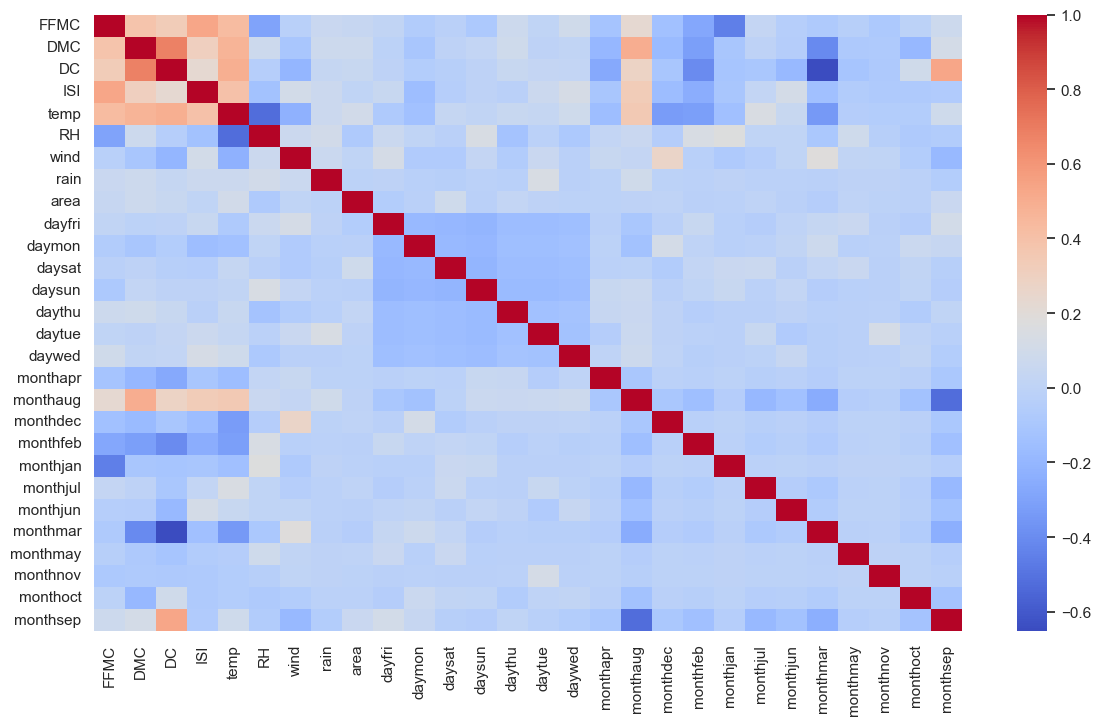

In [16]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = forest.corr()
heatmap = sns.heatmap(corr, cmap="coolwarm")

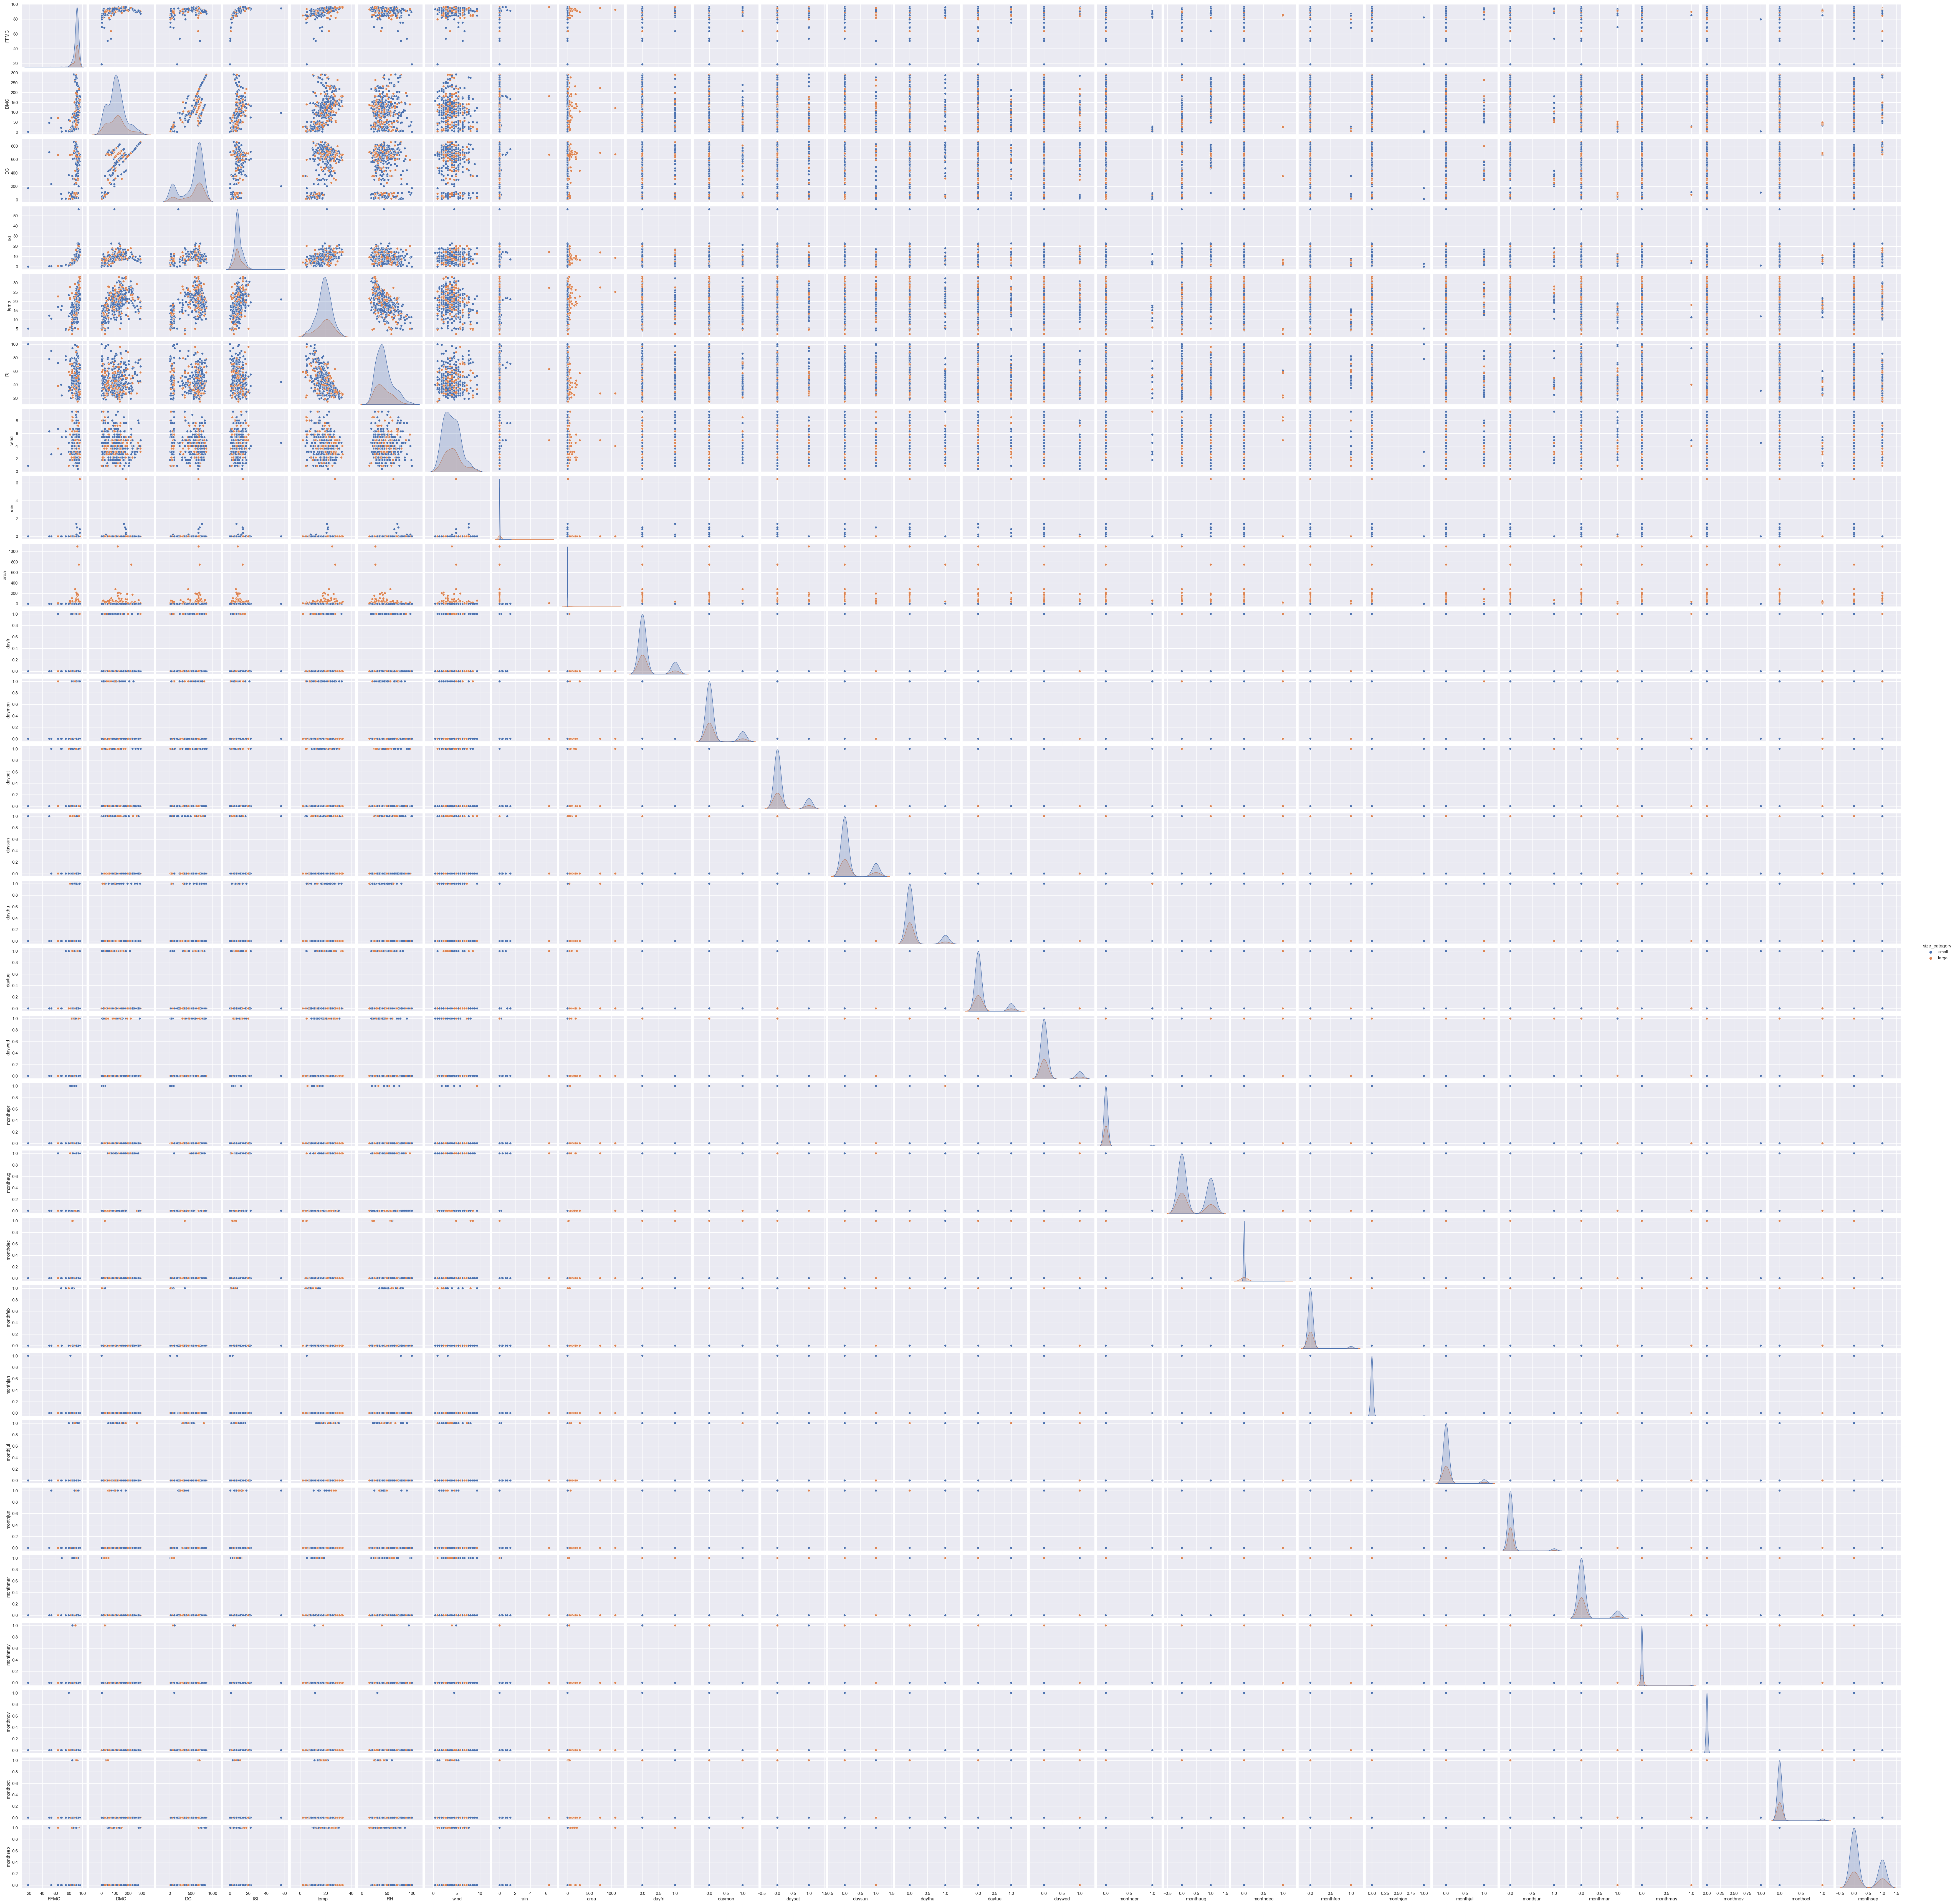

In [17]:
sns.set_style("darkgrid")
sns.pairplot(forest, hue="size_category")
plt.show()

In [18]:
forest[forest.duplicated()]

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
53    aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0  ...         0   
100   aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0  ...         0   
215   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  ...         0   
303   jun  fri  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0  ...         0   
426   aug  thu  91.6  248.4  753.8   6.3  20.4  56   2.2   0.0  ...         0   
461   aug  sat  93.7  231.1  715.1   8.4  18.9  64   4.9   0.0  ...         0   
501   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8  ...         0   
508   aug  fri  91.0  166.9  752.6   7.1  25.9  41   3.6   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
53          0         0         0         0         0         0         0   
100         0         0         0         0         0         0         0   
215         0         0         0         1         0         0         0   
303         0         0         1         0         0         0         0   
426         0         0         0         0         0         0         0   
461         0         0         0         0         0         0         0   
501         0         0         0         0         0         0         0   
508         0         0         0         0         0         0         0   

     monthsep  size_category  
53          0          small  
100         0          small  
215         0          large  
303         0          small  
426         0          small  
461         0          small  
501         0          small  
508         0          small  

[8 rows x 31 columns]

In [19]:
forest1 = forest.drop(labels=["month","day"], axis=1)
forest1

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  ...  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1  ...   
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0  ...   
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0  ...   
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1  ...   
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0  ...   
..    ...    ...    ...   ...   ...  ..   ...   ...    ...     ...  ...   
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0  ...   
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0  ...   
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0  ...   
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0  ...   
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0  ...   

     monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0           0         0         0         0         1         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         1         0         0   
4           0         0         0         0         1         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         1   

     monthoct  monthsep  size_category  
0           0         0          small  
1           1         0          small  
2           1         0          small  
3           0         0          small  
4           0         0          small  
..        ...       ...            ...  
512         0         0          large  
513         0         0          large  
514         0         0          large  
515         0         0          small  
516         0         0          small  

[517 rows x 29 columns]

In [20]:
le = LabelEncoder()
forest1["size_category"] = le.fit_transform(forest1["size_category"])
forest1

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  ...  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1  ...   
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0  ...   
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0  ...   
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1  ...   
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0  ...   
..    ...    ...    ...   ...   ...  ..   ...   ...    ...     ...  ...   
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0  ...   
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0  ...   
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0  ...   
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0  ...   
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0  ...   

     monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0           0         0         0         0         1         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         1         0         0   
4           0         0         0         0         1         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         1   

     monthoct  monthsep  size_category  
0           0         0              1  
1           1         0              1  
2           1         0              1  
3           0         0              1  
4           0         0              1  
..        ...       ...            ...  
512         0         0              0  
513         0         0              0  
514         0         0              0  
515         0         0              1  
516         0         0              1  

[517 rows x 29 columns]

In [21]:
X = forest1.iloc[:, :-1]
y = forest1.iloc[:, -1]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_train

array([[ 0.31227419, -0.09559515,  0.84776472, ..., -0.05270463,
        -0.16878989,  1.38249424],
       [ 0.10927722, -0.26994859,  0.79301684, ..., -0.05270463,
        -0.16878989,  1.38249424],
       [-0.05988692, -0.0182732 , -0.0341957 , ..., -0.05270463,
        -0.16878989, -0.72333032],
       ...,
       [ 0.26152495,  0.61394751,  0.44854476, ..., -0.05270463,
        -0.16878989, -0.72333032],
       [ 0.04161157, -0.4154958 , -0.676784  , ..., -0.05270463,
        -0.16878989, -0.72333032],
       [ 0.71826813, -0.05769223,  0.40418698, ..., -0.05270463,
        -0.16878989, -0.72333032]])

In [24]:
X_test = scale.fit_transform(X_test)
X_test

array([[-1.29121422, -1.3547144 , -1.81225064, ...,  0.        ,
        -0.18196863, -0.66666667],
       [ 1.17700858,  1.23724722,  0.49019315, ...,  0.        ,
        -0.18196863, -0.66666667],
       [ 0.27947301,  1.6757306 ,  0.49597611, ...,  0.        ,
        -0.18196863, -0.66666667],
       ...,
       [ 0.07752751,  1.27110694, -0.47432179, ...,  0.        ,
        -0.18196863, -0.66666667],
       [-0.43855544,  2.62549577,  1.00528956, ...,  0.        ,
        -0.18196863, -0.66666667],
       [ 0.05508912, -0.0815889 ,  0.35635896, ...,  0.        ,
        -0.18196863, -0.66666667]])

In [29]:
def create_model():
    model = Sequential()
    model.add(Dense(8, input_dim=28, kernel_initializer="uniform", activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(4, kernel_initializer="uniform",activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer="uniform",activation="sigmoid"))
    adam = Adam(learning_rate=0.001)
    model.compile(loss="binary_crossentropy", optimiser=adam, metrics"accuracy")
    return model

In [28]:
model = KerasClassifier(build_fn=create_model, verbose=0)
batch_size = [10, 30, 50]
epochs = [10, 30, 50]
param_grid = dict(batch_size=batch_size, epochs=epochs)
gsv = GridSearchCV(estimator=model, param_grid=param_grid, cv=KFold(), verbose = 5)
gsv_res = gsv.fit(X_train, y_train)

C:\Users\marang\AppData\Local\Temp\ipykernel_20752\295098351.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..........batch_size=10, epochs=10;, score=0.726 total time=   3.4s
[CV 2/5] END ..........batch_size=10, epochs=10;, score=0.736 total time=   5.0s
[CV 3/5] END ..........batch_size=10, epochs=10;, score=0.681 total time=   2.7s
[CV 4/5] END ..........batch_size=10, epochs=10;, score=0.806 total time=   2.7s
[CV 5/5] END ..........batch_size=10, epochs=10;, score=0.764 total time=   2.7s
[CV 1/5] END ..........batch_size=10, epochs=30;, score=0.849 total time=   4.2s
[CV 2/5] END ..........batch_size=10, epochs=30;, score=0.736 total time=   4.1s
[CV 3/5] END ..........batch_size=10, epochs=30;, score=0.681 total time=   4.0s
[CV 4/5] END ..........batch_size=10, epochs=30;, score=0.736 total time=   4.0s
[CV 5/5] END ..........batch_size=10, epochs=30;, score=0.819 total time=   4.0s
[CV 1/5] END ..........batch_size=10, epochs=50;, score=0.877 total time=   5.5s
[CV 2/5] END ..........batch_size=10, epochs=50;,

In [31]:
print(gsv_res.best_params_, gsv_res.best_score_)

{'batch_size': 10, 'epochs': 50} 0.872564685344696


In [32]:
def creat_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8, input_dim = 28,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))
    adam = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy',optimizer = adam,metrics='accuracy')
    return model

model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 50,verbose = 0)
learning_rate = [0.1,0.01,0.001]
dropout_rate = [0.0,0.1,0.2]
param_grid = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)
gsv = GridSearchCV(estimator=model,param_grid=param_grid,cv= KFold(),verbose=5)
gsv_r = gsv.fit(X_train,y_train)

C:\Users\marang\AppData\Local\Temp\ipykernel_20752\1096289135.py:12: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 50,verbose = 0)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.726 total time=   6.4s
[CV 2/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.736 total time=   5.4s
[CV 3/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.681 total time=   5.8s
[CV 4/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.736 total time=   5.5s
[CV 5/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.764 total time=   5.4s
[CV 1/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.973 total time=   5.5s
[CV 2/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.931 total time=   5.5s
[CV 3/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.944 total time=   5.6s
[CV 4/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.972 total time=   5.4s
[CV 5/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.917 total time=   5.4s
[CV 1/5] END dropout_rate=0.0, learning_rate=0.001;, score=0.863 total time=   5.3s
[CV 2/5] END dropout_rate=0.0, 

In [33]:
print(gsv_r.best_params_,gsv_r.best_score_)

{'dropout_rate': 0.0, 'learning_rate': 0.01} 0.9472983241081238


## Tuning the hyperparameters

In [51]:
def creat_model(Activation_Function,init):
    model = Sequential()
    model.add(Dense(8, input_dim = 28,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(4,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy',optimizer = adam,metrics='accuracy')
    return model

In [52]:
model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 50,verbose = 0)
Activation_Function = ['relu','tanh','softmax','linear']
init = ['zero','uniform','normal']
param_grid = dict(Activation_Function = Activation_Function,init = init)
gsv = GridSearchCV(estimator=model,param_grid=param_grid,cv= KFold(),verbose=5)
gsv_result = gsv.fit(X_train,y_train)

C:\Users\marang\AppData\Local\Temp\ipykernel_20752\2974159256.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 50,verbose = 0)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END Activation_Function=relu, init=zero;, score=0.932 total time=   6.7s
[CV 2/5] END Activation_Function=relu, init=zero;, score=0.903 total time=   6.6s
[CV 3/5] END Activation_Function=relu, init=zero;, score=0.847 total time=   5.7s
[CV 4/5] END Activation_Function=relu, init=zero;, score=0.986 total time=   6.6s
[CV 5/5] END Activation_Function=relu, init=zero;, score=0.861 total time=   6.0s
[CV 1/5] END Activation_Function=relu, init=uniform;, score=0.918 total time=   6.3s
[CV 2/5] END Activation_Function=relu, init=uniform;, score=0.903 total time=   6.6s
[CV 3/5] END Activation_Function=relu, init=uniform;, score=0.861 total time=   5.9s
[CV 4/5] END Activation_Function=relu, init=uniform;, score=0.944 total time=   5.8s
[CV 5/5] END Activation_Function=relu, init=uniform;, score=0.861 total time=   6.3s
[CV 1/5] END Activation_Function=relu, init=normal;, score=0.890 total time=   6.2s
[CV 2/5] END Activat

In [54]:
print(gsv_result.best_score_,gsv_result.best_params_)

0.9057458162307739 {'Activation_Function': 'relu', 'init': 'zero'}


In [55]:
def creat_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(8,input_dim=28,kernel_initializer='normal', activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(4,kernel_initializer='normal',activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,kernel_initializer='normal',activation='sigmoid'))
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [56]:
model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 50,verbose = 0)
neuron1 = [24,16,8]
neuron2 = [12,8,4]
param_grid = dict(neuron1 = neuron1,neuron2=neuron2)
gsv = GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
gsv_n = gsv.fit(X_train,y_train)

C:\Users\marang\AppData\Local\Temp\ipykernel_20752\2587616079.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 50,verbose = 0)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ............neuron1=24, neuron2=12;, score=0.959 total time=   5.4s
[CV 2/5] END ............neuron1=24, neuron2=12;, score=0.889 total time=   5.4s
[CV 3/5] END ............neuron1=24, neuron2=12;, score=0.917 total time=   5.3s
[CV 4/5] END ............neuron1=24, neuron2=12;, score=0.986 total time=   5.7s
[CV 5/5] END ............neuron1=24, neuron2=12;, score=0.958 total time=   5.4s
[CV 1/5] END .............neuron1=24, neuron2=8;, score=0.932 total time=   5.3s
[CV 2/5] END .............neuron1=24, neuron2=8;, score=0.889 total time=   5.5s
[CV 3/5] END .............neuron1=24, neuron2=8;, score=0.931 total time=   5.6s
[CV 4/5] END .............neuron1=24, neuron2=8;, score=0.986 total time=   5.4s
[CV 5/5] END .............neuron1=24, neuron2=8;, score=0.944 total time=   6.5s
[CV 1/5] END .............neuron1=24, neuron2=4;, score=0.945 total time=   5.7s
[CV 2/5] END .............neuron1=24, neuron2=4;,

In [57]:
print(gsv_n.best_score_,gsv_n.best_params_)

0.9445966482162476 {'neuron1': 8, 'neuron2': 8}


In [58]:
def creat_model():
    model = Sequential()
    model.add(Dense(8,input_dim=28,kernel_initializer='normal', activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(8,kernel_initializer='normal',activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,kernel_initializer='normal',activation='sigmoid'))
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [59]:
model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 50)
model.fit(X_train,y_train)

C:\Users\marang\AppData\Local\Temp\ipykernel_20752\1514990635.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 50)


Epoch 1/50
37/37 [==============================] - 1s 2ms/step - loss: 0.6886 - accuracy: 0.7008
Epoch 2/50
37/37 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.7285
Epoch 3/50
37/37 [==============================] - 0s 2ms/step - loss: 0.6517 - accuracy: 0.7313
Epoch 4/50
37/37 [==============================] - 0s 1ms/step - loss: 0.6033 - accuracy: 0.7562
Epoch 5/50
37/37 [==============================] - 0s 1ms/step - loss: 0.5519 - accuracy: 0.7729
Epoch 6/50
37/37 [==============================] - 0s 1ms/step - loss: 0.5092 - accuracy: 0.7756
Epoch 7/50
37/37 [==============================] - 0s 1ms/step - loss: 0.4818 - accuracy: 0.7839
Epoch 8/50
37/37 [==============================] - 0s 1ms/step - loss: 0.4583 - accuracy: 0.7922
Epoch 9/50
37/37 [==============================] - 0s 1ms/step - loss: 0.4503 - accuracy: 0.8061
Epoch 10/50
37/37 [==============================] - 0s 1ms/step - loss: 0.4211 - accuracy: 0.8199
Epoch 11/50
37/37 [

In [60]:
y_predict = model.predict(X_train)

12/12 [==============================] - 1s 723us/step


In [61]:
accuracy_score(y_train,y_predict)

0.9944598337950139

In [62]:
confusion_matrix(y_train,y_predict)

array([[ 97,   1],
       [  1, 262]], dtype=int64)

In [63]:
print(classification_report(y_train,y_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        98
           1       1.00      1.00      1.00       263

    accuracy                           0.99       361
   macro avg       0.99      0.99      0.99       361
weighted avg       0.99      0.99      0.99       361



In [64]:
y_test_pred = model.predict(X_test)

5/5 [==============================] - 0s 4ms/step


In [65]:
accuracy_score(y_test,y_test_pred)

0.9615384615384616

In [66]:
confusion_matrix(y_test,y_test_pred)

array([[ 39,   2],
       [  4, 111]], dtype=int64)

In [67]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        41
           1       0.98      0.97      0.97       115

    accuracy                           0.96       156
   macro avg       0.94      0.96      0.95       156
weighted avg       0.96      0.96      0.96       156

